### About Dataset 
This dataset contains daily records of air pollutant concentrations collected over time, including PM2.5, PM10, NO₂, SO₂, CO, and Ozone. It also logs the Air Quality Index (AQI), along with date (day, month, year) also includes number of holidays and weekday representation. It is ideal for developing models to predict AQI, study pollution patterns, and analyze the effects of temporal or holiday factors on air quality.

In [80]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [6]:
data = pd.read_csv('Delhi_AQI_dataset.csv')

In [8]:
#lets check first five rows 
data.head()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149


In [10]:
#lets check missing values in our dataset 
data.isnull().sum()

Date              0
Month             0
Year              0
Holidays_Count    0
Days              0
PM2.5             0
PM10              0
NO2               0
SO2               0
CO                0
Ozone             0
AQI               0
dtype: int64

In [14]:
#lets see if there is any duplicated values in our dataset 
data.duplicated().sum()

0

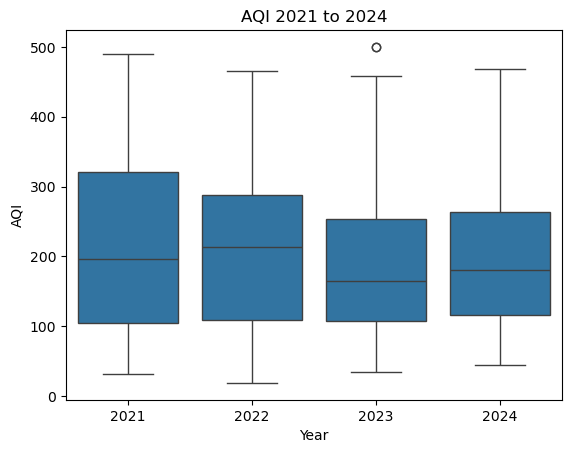

In [24]:
#lets see if there is any relation between year and aqi
sns.boxplot(x = data['Year'],y=data['AQI'])
plt.title('AQI 2021 to 2024')
plt.show()

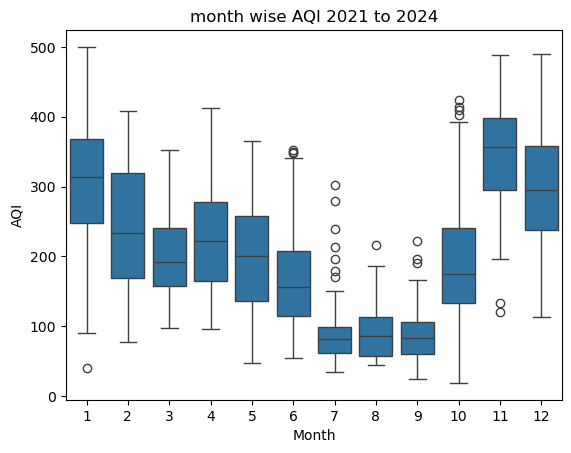

In [28]:
sns.boxplot(x = data['Month'],y=data['AQI'])
plt.title('month wise AQI 2021 to 2024')
plt.show()

#### Interpretation
- we can see there is high drop in AQI from july to sep cause Rain removes pollutants, wind disperses them
- then their is sudden increase in AQI from october to feb, we can say in winter AQI is usually high because Temperature inversion, low wind,   stubble burning, firecrackers

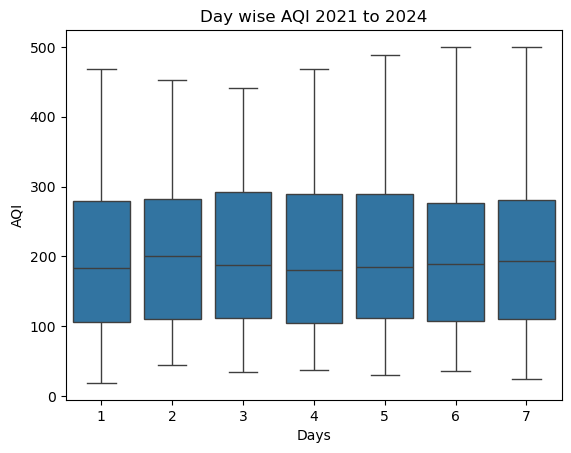

In [36]:
sns.boxplot(x = data['Days'],y=data['AQI'])
plt.title('Day wise AQI 2021 to 2024')
plt.show()

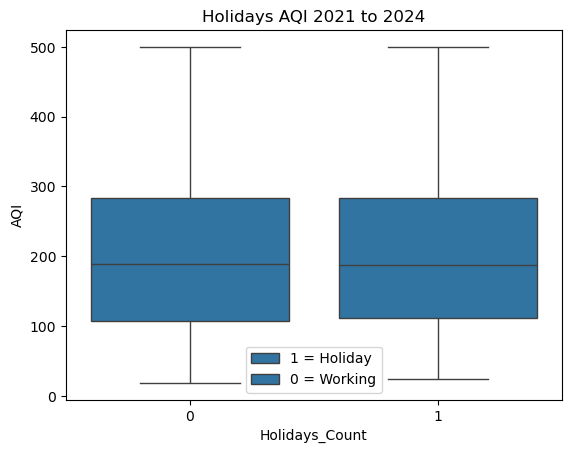

In [46]:
sns.boxplot(x = data['Holidays_Count'],y=data['AQI'])
plt.title('Holidays AQI 2021 to 2024')
plt.legend(["1 = Holiday", "0 = Working"])
plt.show()

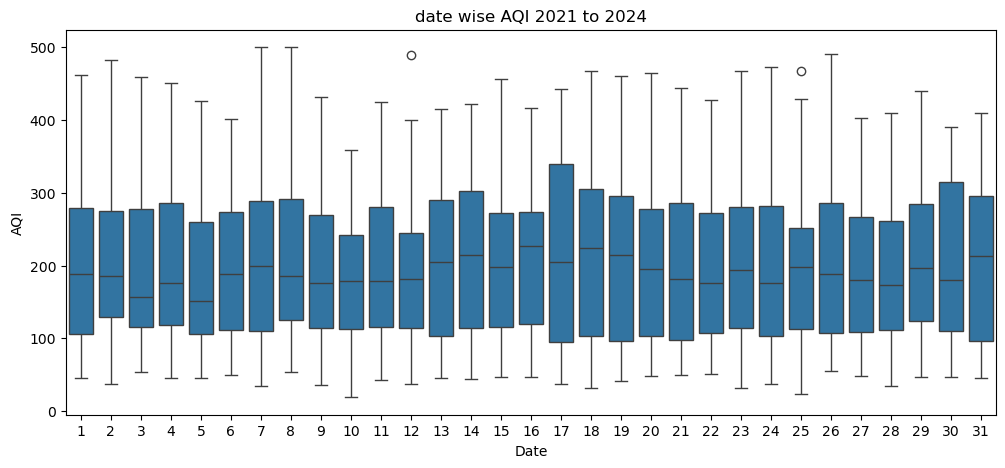

In [56]:
plt.figure(figsize=(12,5))
sns.boxplot(x = data['Date'],y=data['AQI'])
plt.title('date wise AQI 2021 to 2024')
plt.show()

In [118]:
from scipy import stats

# Null hypothesis: No relation between Year and AQI
# Alternative hypothesis: There is a relation

# Extract AQI groups by year
year_2021 = data[data['Year'] == 2021]['AQI']
year_2022 = data[data['Year'] == 2022]['AQI']
year_2023 = data[data['Year'] == 2023]['AQI']
year_2024 = data[data['Year'] == 2024]['AQI']

# --- Normality Test (Shapiro-Wilk) ---
# H0: Data is normally distributed
# HA: Data is not normally distributed

shapiro_stat, shapiro_p = stats.shapiro(year_2021)

if shapiro_p < 0.05:
    print("Reject H0 → Data is NOT normally distributed")
else:
    print("Fail to reject H0 → Data is normally distributed")

# --- Since non-normal → Use Kruskal-Wallis test ---
# H0: All years have same AQI distribution
# HA: At least one year is different

kw_stat, kw_p = stats.kruskal(year_2021, year_2022, year_2023, year_2024)

print("Kruskal p-value:", kw_p)

if kw_p < 0.05:
    print("Reject H0 → At least one year's AQI differs significantly")
else:
    print("Fail to reject H0 → No significant difference in AQI between years")

Reject H0 → Data is NOT normally distributed
Kruskal p-value: 0.015038999188123386
Reject H0 → At least one year's AQI differs significantly


In [150]:
#is there any relation between Holidays_Count and AQI
#ho: there is no relation between holidays_count and AQI
#ha: there is relation between holidays_count and AQI
working = data[data['Holidays_Count'] == 0]['AQI']
holiday = data[data['Holidays_Count'] == 1]['AQI']
stats.shapiro(working)
#since data is not normally distributed we will use manwhitneyu test otherwise we would have used t-test
t_stats,pvalue = stats.mannwhitneyu(working,holiday)
print(pvalue)
if pvalue<0.05:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis. means we do not have enough evidence yet that if there is any relation between holidays count and AQI')

0.9402884783912789
fail to reject the null hypothesis. means we do not have enough evidence yet that if there is any relation between holidays count and AQI


In [152]:
data

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149
...,...,...,...,...,...,...,...,...,...,...,...,...
1456,27,12,2024,0,5,58.43,249.17,41.69,65.89,0.99,36.25,263
1457,28,12,2024,0,6,33.83,150.77,33.31,66.14,0.79,35.19,113
1458,29,12,2024,1,7,31.21,139.75,27.01,65.94,0.57,35.88,142
1459,30,12,2024,0,1,38.01,152.83,29.12,65.16,0.55,38.38,116


In [160]:
from scipy.stats import shapiro
stats,p = shapiro(data['PM2.5'])
if p<0.05:
    print('data is not normal')
print(p)

data is not normal
2.1978872149877147e-39


In [162]:
from scipy.stats import shapiro
stats,p = shapiro(data['AQI'])
if p<0.05:
    print('data is not normal')
print(p)

data is not normal
1.0374574840603726e-19


In [176]:
#we are going to check if there is any relation between pm2.5 and AQI
#since our data is not normal we will use Spearman Correlation, if our data was normal then we would have used pearson correlation 
from scipy.stats import spearmanr
stats,p = spearmanr(data['PM2.5'],data['AQI'])
if p<0.05:
    print('reject ho, mean there is relation between PM2.5 and AQI')
else:
    print('fail to reject ho')
print(p)

reject ho, mean there is relation between PM2.5 and AQI
0.0


In [214]:
col = ['PM2.5', 'PM10','NO2', 'SO2', 'CO', 'Ozone']
for i in data[col]:
    stats,p = spearmanr(data[i],data['AQI'])
    print({i:p})

{'PM2.5': 0.0}
{'PM10': 0.0}
{'NO2': 4.805564103559507e-20}
{'SO2': 0.1605572661171712}
{'CO': 3.813445398050387e-229}
{'Ozone': 1.4655311944436045e-11}


In [218]:
data.drop(['Holidays_Count','SO2'],inplace = True,axis = 1)

In [222]:
x = data.drop('AQI',axis = 1)
y = data['AQI']

In [226]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)
print(x_train.shape)
print(y_train.shape)

(1168, 9)
(1168,)


In [228]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [230]:
model_dt = DecisionTreeRegressor()

In [232]:
model_dt.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [236]:
y_pred = model_dt.predict(x_test)

In [242]:
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

1633.9078498293516
0.8664701863252764


In [245]:
import tensorflow

In [247]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [249]:
model = Sequential()
model.add(Dense(64,activation = 'relu',input_shape = (x_train.shape[1],)))
model.add(Dense(1,activation = 'linear'))

In [255]:
model.compile(loss = 'mean_squared_error',optimizer = 'adam')

In [263]:
history = model.fit(
          x_train,
          y_train,
          epochs = 100,
          batch_size = 32,
          validation_split = 0.2,
          verbose = 1)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1084.4324 - val_loss: 1071.8490
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 890.4382 - val_loss: 1093.8962
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1114.9862 - val_loss: 1137.7219
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1042.6770 - val_loss: 1066.7969
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1055.4497 - val_loss: 1107.3419
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1141.9485 - val_loss: 1237.3459
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 970.7820 - val_loss: 1074.1301
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 938.6109 - val_loss: 1073.3721
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1011.3344 - val_loss: 1071.0922
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 929.9904 - val_loss: 1122.7604
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 961.9648 - val_loss: 1066.1744
Ep

In [265]:
y_pred = model.predict(x_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [267]:
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

951.5289916992188
0.9222370386123657


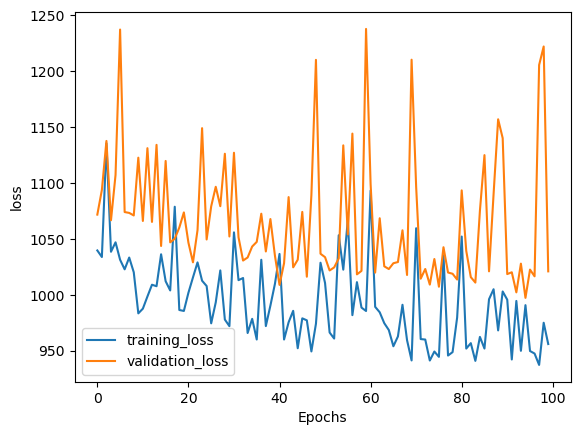

In [277]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training_loss','validation_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

In [285]:
import pickle 
pickle.dump(model,open('model.pkl','wb'))
pickle.dump(data,open('data.pkl','wb'))

In [287]:
data.columns

Index(['Date', 'Month', 'Year', 'Days', 'PM2.5', 'PM10', 'NO2', 'CO', 'Ozone',
       'AQI'],
      dtype='object')

In [293]:
data['Year'].unique()

array([2021, 2022, 2023, 2024], dtype=int64)

In [337]:
data['Ozone'].max()

115.87

In [297]:
data

,Date,Month,Year,Days,PM2.5,PM10,NO2,CO,Ozone,AQI
0,1,1,2021,5,408.80,442.42,160.61,2.77,43.19,462
1,2,1,2021,6,404.04,561.95,52.85,2.60,16.43,482
2,3,1,2021,7,225.07,239.04,170.95,1.40,44.29,263
3,4,1,2021,1,89.55,132.08,153.98,1.01,49.19,207
4,5,1,2021,2,54.06,55.54,122.66,0.64,48.88,149
...,...,...,...,...,...,...,...,...,...,...
1456,27,12,2024,5,58.43,249.17,41.69,0.99,36.25,263
1457,28,12,2024,6,33.83,150.77,33.31,0.79,35.19,113
1458,29,12,2024,7,31.21,139.75,27.01,0.57,35.88,142
1459,30,12,2024,1,38.01,152.83,29.12,0.55,38.38,116


In [339]:
import pickle
with open(r"C:\Delhi_AQI_Dataset\model.pkl",'rb') as f:
    model = pickle.load(f)
print(model)

<Sequential name=sequential, built=True>
